<a href="https://colab.research.google.com/github/vanamaabhi2004/ML-AI/blob/main/Intro_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Popular websites for Datasets
# 1. Kaggle
# 2. UCI ML
# ....... there are a lot of other websites that host tonnes of datasets.

# sklearn pre-installed datasets:
# 1. https://scikit-learn.org/stable/datasets/real_world.html
# 2. https://scikit-learn.org/stable/datasets/toy_dataset.html

# You can also create synthetic datasets with
# sklearn [science-kit learn] --> the main package for ML

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples = 100, n_features = 5, n_targets = 1, n_informative = 3)
# X and Y are NumPy arrays

In [ ]:
X.shape

(100, 5)

In [ ]:
Y.shape

(100,)

In [ ]:
# Loading a pre-installed sklearn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html
from sklearn.datasets import load_diabetes
dataset  = load_diabetes()

In [ ]:
type(dataset)

sklearn.utils._bunch.Bunch

In [ ]:
dir(dataset) # Properties (components) of the dataset can be listed with dir()

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [ ]:
dataset.keys() # Alternate way

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
X = dataset.data
X.shape # Input

(442, 10)

In [ ]:
Y = dataset.target # Output

In [ ]:
print(dataset.DESCR) # Description of the dataset

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
Y[:5] # First 5 outputs

array([151.,  75., 141., 206., 135.])

In [ ]:
dataset.feature_names # Names of the features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
# Uni-Variate and Single-Output Regression Task
#f(bmi) --> Y
inp = X[:,2] # bmi [using the bmi column only!]
# Y --> output

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 2, metric = 'euclidean', weights = 'uniform')
knn.fit(inp[:5].reshape(-1,1), Y[:5])
# The data passed to the fit function will be used by the ML model (knn) to make the predictions

KNeighborsRegressor(metric='euclidean', n_neighbors=2)

In [ ]:
inp[:5], Y[:5]

(array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469]),
 array([151.,  75., 141., 206., 135.]))

In [ ]:
import numpy as np
knn.predict(np.array([0.06, -0.05]).reshape(-1,1))
# predict function to get the estimate for input samples

array([146., 105.])

In [ ]:
(151 + 141)/2

146.0

In [ ]:
(75 + 135)/2

105.0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inp.reshape(-1,1), Y, test_size = 0.3, random_state = 1)

In [ ]:
x_train.shape

(309, 1)

In [ ]:
x_test.shape

(133, 1)

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 1, metric = 'euclidean')
knn.fit(x_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=1)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([104.,  72., 128.,  96., 138., 237., 275., 151.,  49.,  50., 310.,
       111., 172.,  49., 103.,  95., 141.,  54.,  84., 276.,  73.,  75.,
        61.,  72.,  45., 232.,  49.,  52., 127., 235., 134., 113., 173.,
        54., 158., 225.,  57., 132.,  52.,  84., 150., 134., 172.,  91.,
       171.,  87., 170., 127.,  85., 111.,  95., 280.,  93.,  72., 265.,
       124.,  67., 172.,  48., 252.,  69., 257., 150., 111., 275.,  96.,
        72., 295., 166.,  70.,  39., 144.,  47., 171., 283.,  83., 252.,
        72.,  52., 283.,  39., 179.,  61., 177.,  86., 131.,  48., 143.,
       242., 151., 113., 235.,  94.,  94.,  96., 295.,  54.,  49., 232.,
        70.,  70., 177.,  91., 171., 257., 128., 131., 151.,  96.,  83.,
        50.,  85., 138.,  72., 200., 202., 158.,  55., 200., 171., 158.,
       132., 336., 109., 177., 200.,  96., 174.,  91., 297., 185., 202.,
       126.])

In [ ]:
y_test

array([ 78., 152., 200.,  59., 311., 178., 332., 132., 156., 135., 220.,
       233.,  91.,  51., 195., 109., 217.,  94.,  89., 111., 129., 181.,
       168.,  97., 115., 202.,  84., 147., 253., 144., 262., 115.,  68.,
        65., 252., 212., 142., 215., 180., 163., 151., 283.,  66.,  83.,
       214., 189., 302.,  93., 178., 241.,  52., 144., 102., 200., 232.,
        97., 109.,  55.,  63.,  98.,  88., 233., 235.,  97., 243.,  59.,
       138., 220., 137.,  72., 109.,  71.,  74., 219., 196., 170., 199.,
        71., 155.,  52.,  63.,  88.,  97., 100.,  64., 107.,  49.,  60.,
       346., 104., 259., 143., 190., 104.,  77., 141., 214.,  51., 175.,
       167.,  90.,  39., 160., 101., 180.,  69., 281., 281., 214.,  96.,
       146., 268., 249.,  55., 107., 172., 162., 134.,  48., 150.,  63.,
       245., 237., 185., 131., 144.,  79., 127., 216.,  90., 178., 122.,
        92.])

**Some Evaluation Metrics** (for regression tasks)

1.   Sum of Absolute Errors (SAE)
2.   Mean Absolute Error (MAE)
3.   Sum of Squared Errors (SSE)
4.   Mean Squared Error (MSE)



In [ ]:
# Evaluation Metrics [Regression]

# sum(|[y_pred - y_actual]|) # SAE

# SAE/num_Samples_test # MAE

# sum(|[y_pred - y_actual]|^2) # SSE
# SSE/num_samples_test # MSE


np.abs(y_pred - y_test).sum() # SAE

9510.0

In [ ]:
np.abs(y_pred - y_test).sum()/y_test.shape[0] # MAE

71.50375939849624

In [ ]:
((np.abs(y_pred - y_test))** 2).sum() # SSE

1003118.0

In [ ]:
((np.abs(y_pred - y_test))** 2).sum() /y_test.shape[0] # MSE

7542.2406015037595

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

7542.2406015037595

**Refer to this link for more regression metrics**:
> https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [ ]:
# Checking which value of n_neighbors gives us the best score.
mse = []
for k in range(1,26):
  knn = KNeighborsRegressor(n_neighbors = k, metric = 'euclidean')
  knn.fit(x_train, y_train)

  mse.append(mean_squared_error(y_test, knn.predict(x_test)))

In [ ]:
min(mse) # Lower the better

4480.267905112498

In [ ]:
mse.index(min(mse))

22

In [ ]:
range(1,26)[mse.index(min(mse))] # Best value of n_neighbors for the test dataset

# Question to Ponder: Would you the consider the best value that you obtained just now to be an unbiased estimate
# of the true performance?

23

In [ ]:
knn.predict(x_train)

array([263.68, 116.92, 190.08, 139.68, 164.56, 148.44, 117.52, 251.64,
        83.28, 189.32,  91.64, 135.84, 102.2 ,  91.16, 123.76, 212.44,
       116.92, 198.24, 201.24, 141.52, 118.56, 159.48, 115.4 , 129.48,
       164.56,  82.32,  94.32, 109.4 , 183.  , 111.08,  92.48, 111.8 ,
       189.36, 139.68, 207.56,  98.64,  84.44, 207.44, 116.92, 118.56,
       209.6 ,  89.24, 189.44, 263.68, 159.48, 210.04, 209.4 , 183.  ,
       143.56, 188.92, 123.76, 194.44, 102.92, 114.56, 164.56, 111.08,
        98.12, 119.44,  84.44, 207.56, 189.36, 194.92, 209.4 , 202.96,
       190.08,  83.28, 119.44, 234.96, 164.48, 263.28, 144.52, 189.44,
        91.16, 142.92,  89.08, 188.96, 144.52, 148.44, 117.52, 139.08,
       192.72, 135.84, 119.44, 116.92, 135.84, 141.36, 245.24, 202.44,
       209.6 ,  89.08, 148.72, 114.56, 111.8 , 123.76, 120.12, 202.44,
       195.04, 209.4 , 112.72, 191.72, 164.56,  88.2 , 202.96, 190.08,
       111.8 , 234.96, 206.56,  89.8 , 185.16, 188.96, 141.36, 114.76,
      

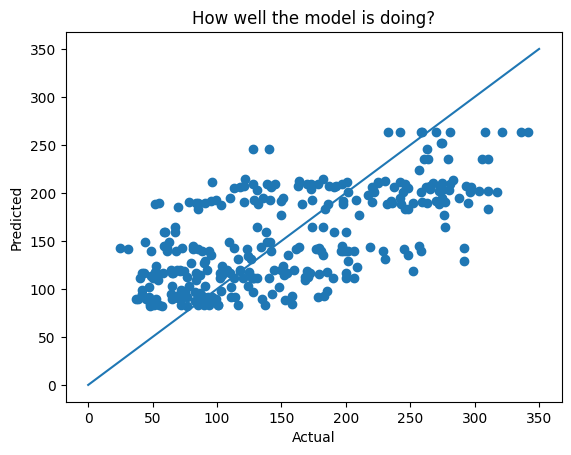

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_train, knn.predict(x_train))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('How well the model is doing?')
plt.plot([0,350],[0,350])
plt.show()